<a href="https://colab.research.google.com/github/vineelaarani/Projects/blob/main/EmployeeAttritionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
attrdata = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
attrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


 we can see that there are null values in the dataset

In [ ]:
attrdata.drop(0,inplace=True)
attrdata.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

If there is a null value, this is to drop

In [ ]:
attrdata.dropna(axis=0,inplace=True)

In [ ]:
attrdata.shape

(1469, 35)

In [ ]:
# print all of the data types and their unique values
for column in attrdata.columns:
    if attrdata[column].dtype == object:
        print(str(column) + ' : '+ str(attrdata[column].unique()))
        print(attrdata[column].value_counts())

Attrition : ['No' 'Yes']
Attrition
No     1233
Yes     236
Name: count, dtype: int64
BusinessTravel : ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
BusinessTravel
Travel_Rarely        1042
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Research & Development' 'Sales' 'Human Resources']
Department
Research & Development    961
Sales                     445
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       605
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Male' 'Female']
Gender
Male      882
Female    587
Name: count, dtype: int64
JobRole : ['Research Scientist' 'Laboratory Technician' 'Manufacturing Director'
 'Healthcare Representative' 'Manager' 'Sales Representative'
 'Research Direc

In [ ]:
# remove useless columns
# Remove useless columns, ignoring errors if columns don't exist
attrdata = attrdata.drop(['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount'], axis=1, errors='ignore')

In [ ]:
#Unique attributes in age
age = attrdata["Age"].value_counts()
age

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    39
26    39
44    33
46    33
43    32
50    30
25    26
24    26
47    24
49    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
58    14
23    14
56    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

<Axes: title={'center': 'Count of different Age'}, xlabel='Age'>

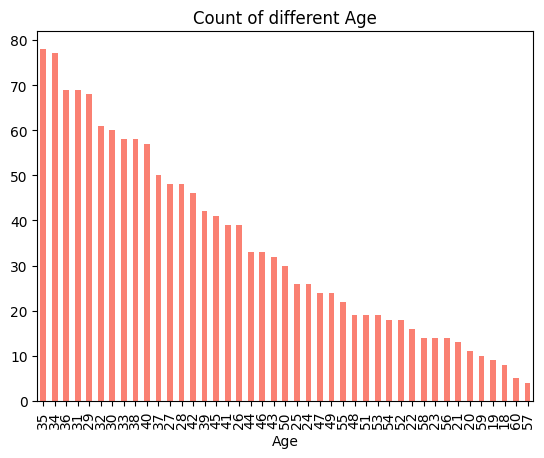

In [ ]:
attrdata['Age'].value_counts().plot(kind='bar',color=['salmon'],title="Count of different Age")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  Text(37, 0, '55'),
  Text(38, 0, 

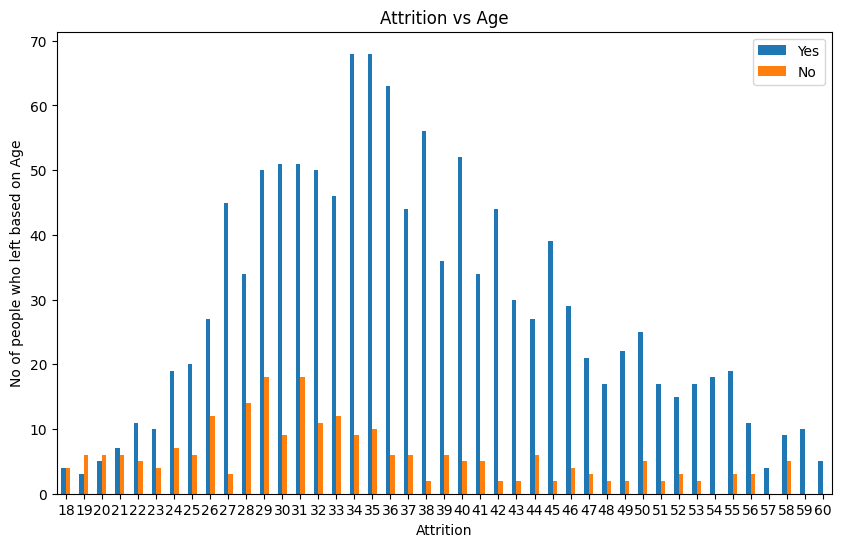

In [ ]:
#Create a plot for crosstab

pd.crosstab(attrdata['Age'],attrdata['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Age")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on Age")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

In [ ]:
dept = attrdata["Department"].value_counts()
dept

Department
Research & Development    961
Sales                     445
Human Resources            63
Name: count, dtype: int64

<Axes: title={'center': 'Department'}, xlabel='Department'>

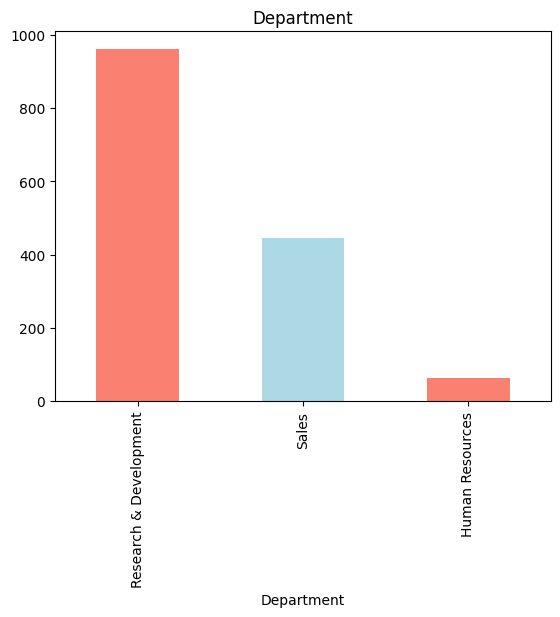

In [ ]:
attrdata['Department'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Department")

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

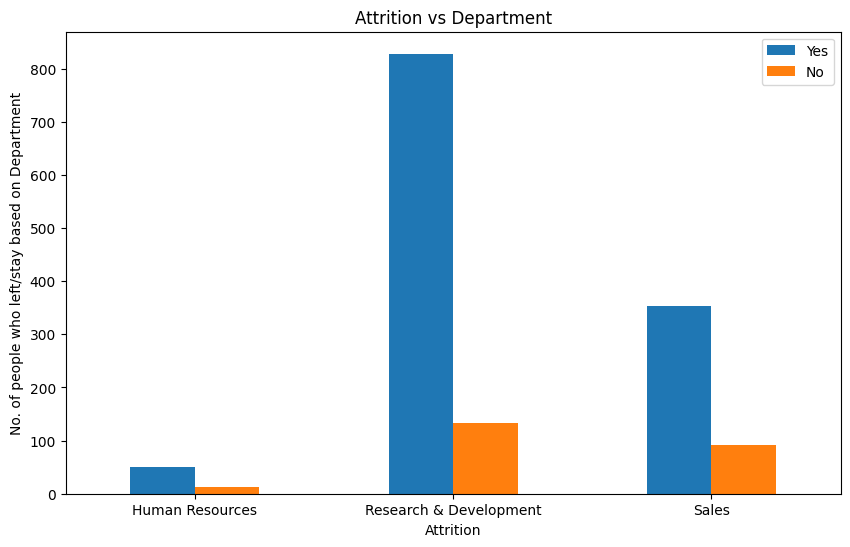

In [ ]:
#Create a plot for crosstab

pd.crosstab(attrdata['Department'],attrdata['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Department")
plt.xlabel("Attrition")
plt.ylabel("No. of people who left/stay based on Department")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

In [ ]:
JobSatisfaction = attrdata["JobSatisfaction"].value_counts()
JobSatisfaction

JobSatisfaction
4    458
3    442
1    289
2    280
Name: count, dtype: int64

<Axes: title={'center': 'JobSatisfaction'}, xlabel='JobSatisfaction'>

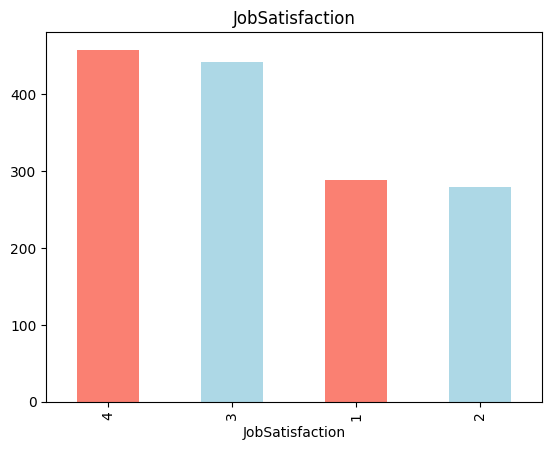

In [ ]:
attrdata['JobSatisfaction'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="JobSatisfaction")

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

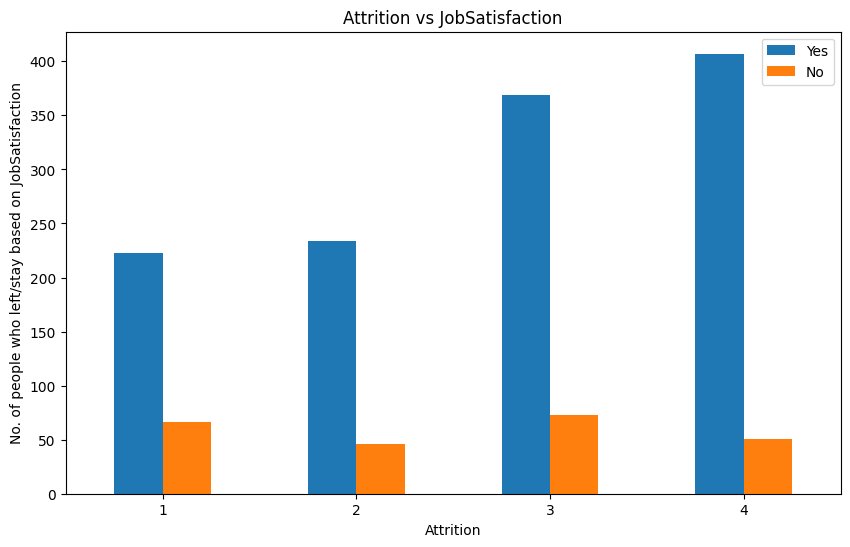

In [ ]:
#Create a plot for crosstab

pd.crosstab(attrdata['JobSatisfaction'],attrdata['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs JobSatisfaction")
plt.xlabel("Attrition")
plt.ylabel("No. of people who left/stay based on JobSatisfaction")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Transform non-numerical columns into numerical columns
for column in attrdata.columns:
    # Check the data type of the column
    if attrdata[column].dtype == 'object':
        # Apply LabelEncoder to non-numeric columns
        attrdata[column] = LabelEncoder().fit_transform(attrdata[column])

In [ ]:
attrdata

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
5,32,0,1005,1,2,2,1,4,1,79,...,3,3,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


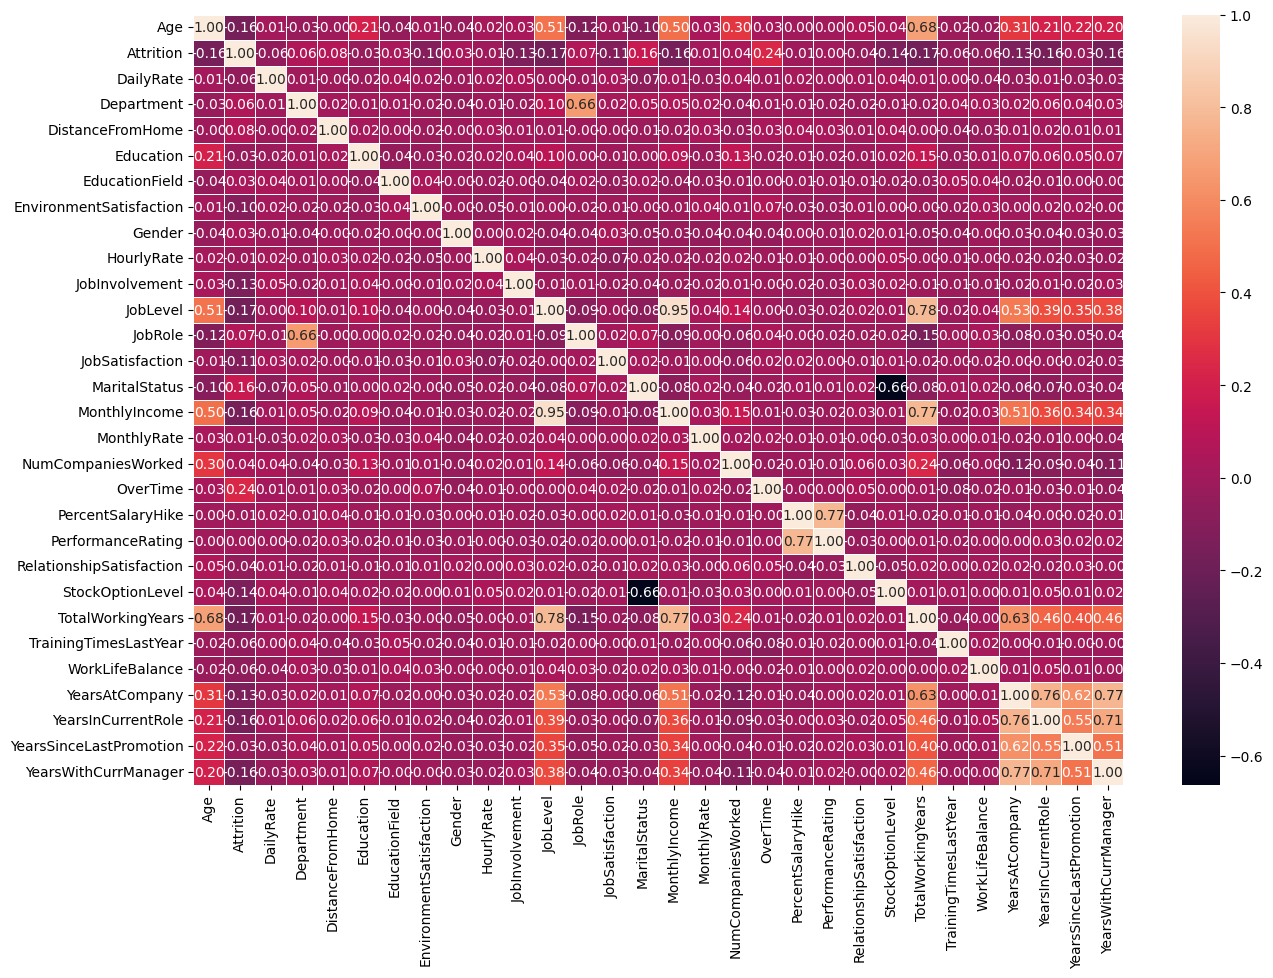

In [ ]:
# Let's make our correlation matrix visual
corr_matrix=attrdata.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [ ]:
#split the data
X = attrdata.iloc[:, 1:attrdata.shape[1]].values
Y = attrdata.iloc[:, 0].values

In [ ]:
#split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# get the accuracy on the training data set
forest.score(X_train, Y_train)

0.9936421435059037

In [ ]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(Y_test, forest.predict(X_test))
TN = cm[0][1]
TP = cm[0][0]
FN = cm[1][1]
FP = cm[1][0]

print(cm)
print('Model Testing Accuracy = {}'.format( (TP + TN) / (TP + TN + FN + FP) ))

[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model Testing Accuracy = 1.0


Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.44208567, -1.14733901, -0.48797105, ..., -0.60716154,
        -0.36247087, -0.57504155],
       [-0.44208567, -0.68568894,  1.38400153, ...,  0.22532271,
        -0.36247087, -0.57504155],
       [-0.44208567, -0.08579072, -0.48797105, ..., -0.88465629,
        -0.67016588, -0.57504155],
       ...,
       [-0.44208567, -0.55978437, -0.48797105, ..., -0.32966679,
        -0.67016588, -0.00645534],
       [-0.44208567, -1.58183319, -0.48797105, ..., -1.16215104,
        -0.67016588, -1.14362777],
       [-0.44208567,  1.17325493,  1.38400153, ...,  0.78031221,
        -0.67016588,  0.84642398]])

In [ ]:
X_test_scaled

array([[ 2.26200501, -1.13005799,  1.38400153, ..., -1.16215104,
        -0.67016588, -1.14362777],
       [-0.44208567, -1.18930719,  1.38400153, ...,  0.78031221,
         2.09908922,  1.4150102 ],
       [ 2.26200501, -0.3598183 ,  1.38400153, ..., -0.60716154,
         0.25291915, -0.57504155],
       ...,
       [-0.44208567, -0.84368682, -0.48797105, ...,  0.50281746,
         2.71447925,  1.13071709],
       [ 2.26200501, -0.13269634,  1.38400153, ...,  0.78031221,
        -0.67016588,  1.13071709],
       [ 2.26200501, -0.41906751,  1.38400153, ..., -1.16215104,
        -0.36247087, -1.14362777]])

training the model

In [ ]:
log_reg=LogisticRegression(random_state=0).fit(X_train_scaled,Y_train)

In [ ]:
log_reg.predict(X_train_scaled)

array([32, 31, 31, ..., 34, 31, 27])

In [ ]:
#accuracy of training data

In [ ]:
log_reg.score(X_train_scaled,Y_train)

0.25158946412352406

Accuracy of testing data

In [ ]:
log_reg.score(X_test_scaled,Y_test)

0.09239130434782608

In [ ]:
log_reg1=LogisticRegression(random_state=0,
                            C=1,fit_intercept=True,
                            ).fit(X_train_scaled,Y_train)

In [ ]:
log_reg1.score(X_train_scaled,Y_train)

0.25158946412352406

In [ ]:
log_reg1.score(X_test_scaled,Y_test)

0.09239130434782608